In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Convert your **Gibbs sampler** from the previous homework to be a **Metropolis within Gibbs** sampler. 
- Do not derive any full conditionals and instead just use the joint distribution which is the product of the likelihood with the priors 
    - Note that in fact you must only be proportional to the joint since irrelevant priors of "the other parameter" will cancel in the ratio
- Note that $\tau$ must be positive so proposals $\tilde \tau$ must also be positive. The easiest way to achieve this would be to use independent samples (that do not depend on $\tau^{(t-1)}$ from exponential, half normal, gamma, or inverse gamma distributions (and other distributions defining strictly positive random variables).
- When considering using independent proposal distributions one option of some note is to use the prior $p(\tau)$ as this proposal distribution

*Clearly articulate your specification and provide a demonstration showing the Bayesian inference it provides, in contrast to that of your previous Gibbs sampler (of Q2 from the last homework).*


In [14]:
n = 30; x = stats.norm.rvs(size=n); C,G = 2,1000  # chains, MH withing Gibbs samples
theta,tau = np.zeros([C,G]),np.ones([C,G])  # initialization


for c in range(C):
    for g in range(1,G):
        # tau_tilde = stats.gamma(a=4,scale=1/2).rvs()
        #try different tau_tilde
        tau_tilde = stats.truncnorm(a=0, b=np.inf, loc=0, scale=3).rvs()
        
        likelihood_tau_tilde = np.prod(stats.norm.pdf(x, loc=theta[c, g-1], scale=tau_tilde**(-0.5)))
        likelihood_tau_prev = np.prod(stats.norm.pdf(x, loc=theta[c, g-1], scale=tau[c, g-1]**(-0.5)))

        weight = likelihood_tau_tilde/likelihood_tau_prev

        tau_acceptance_probability = np.prod(
        (weight)*(1/1)*\
        ((stats.truncnorm(a=0, b=np.inf, loc=0, scale=3).pdf(tau_tilde))/\
         stats.truncnorm(a=0, b=np.inf, loc=0, scale=3).pdf(tau[c,g-1]))
        )
        
        if stats.uniform().rvs() < tau_acceptance_probability:
            tau[c,g] = tau_tilde
        else:
            tau[c,g] = tau[c,g-1]
        

        theta_tilde = stats.norm(theta[c,g-1], scale=1/4).rvs()

        likelihood_theta_tilde = np.prod(stats.norm.pdf(x, loc=theta_tilde, scale=tau[c, g]**(-0.5)))
        likelihood_theta_prev = np.prod(stats.norm.pdf(x, loc=theta[c, g-1], scale=tau[c, g]**(-0.5)))
        weight = likelihood_theta_tilde/likelihood_theta_prev


        theta_acceptance_probability = np.prod(
        weight*\
        (stats.t(df=2).pdf(theta_tilde)/\
         stats.t(df=2).pdf(theta[c,g-1])))
        
        if stats.uniform().rvs() < theta_acceptance_probability:
            theta[c,g] = theta_tilde
        else:
            theta[c,g] = theta[c,g-1]


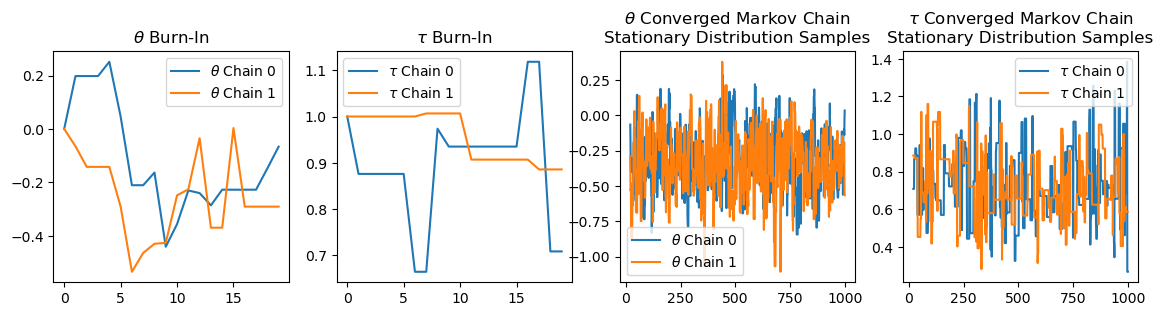

In [15]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 1000
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();         


Theta 95% credidble interval:  [-0.71473162  0.13668877]
Tau 95% credidble interval:  [0.44189163 1.16196616]


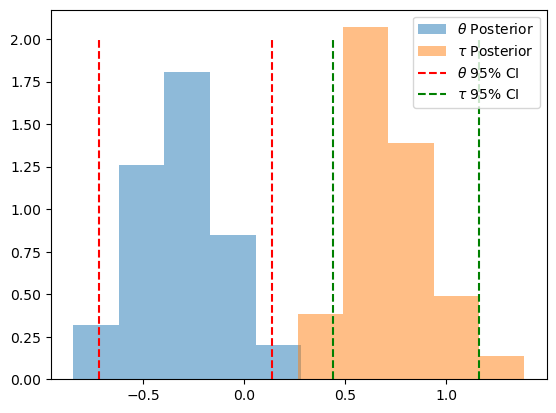

In [16]:
# Bayesian inference
theta_ci = np.percentile(theta[0,burn:], [2.5, 97.5])
tau_ci = np.percentile(tau[0,burn:], [2.5, 97.5])
plt.hist(theta[0, burn:], bins=5, density=True, alpha=0.5, label="$\\theta$ Posterior")
plt.hist(tau[0, burn:], bins=5, density=True, alpha=0.5, label="$\\tau$ Posterior")
plt.vlines(theta_ci, 0, 2, colors='r', linestyles='--', label="$\\theta$ 95% CI")
plt.vlines(tau_ci, 0, 2, colors='g', linestyles='--', label="$\\tau$ 95% CI")
plt.legend()
print("Theta 95% credidble interval: ", theta_ci)
print("Tau 95% credidble interval: ", tau_ci)

In the previous Gibbs Sampler that we created, we did not have a accept/reject portion in each iteraction. Instead, we directly sampled from the full conditional, which did not require any rejecting. In this week's Gibbs Sampler, we incorporated the accept/reject portion, which the probability was determined through specifiying our proposal distribution (the hyperparameter). As the question suggested, I used a positive proposal (Truncated Normal Distribution) truncnorm(0,3) for $\tilde{\tau}^{(t)}$ and used $N(\theta^{(t-1)}, 0.25)$ for $\tilde{\theta}^{(t)}$, which is estimating the parameter based on previous iteration. This is unique of Gibbs Sampling with Metropolis Hastings since the previous Gibbs Sampler relied on data from all iterations.  

### Q2

Adjust your **Metropolis within Gibbs** sampler as follows.

- Use the following **dependent** proposal for $\tau$

```Python
stats.truncnorm(a=-tau_t_minus_1/s, b=np.Inf,
                loc=tau_t_minus_1, scale=s)
```

- Use a prior for $\theta$ that is not a normal distribution 


*Provide a demonstration showing the Bayesian inference provided by this sampler. Then discuss the necessity (or lackthereof)  of analytically determining the full conditional distributions when using Metropolis-Hastings.*


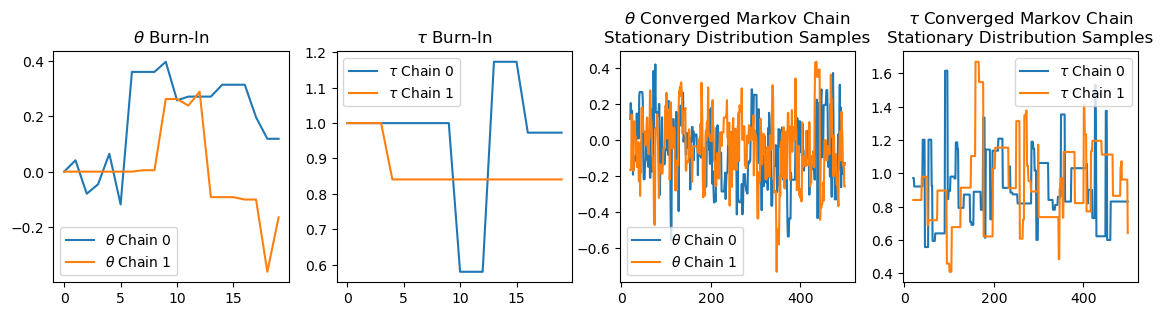

In [ ]:
n = 30; x = stats.norm.rvs(size=n); C,G = 2,1000  # chains, MH withing Gibbs samples
theta,tau = np.zeros([C,G]),np.ones([C,G])  # initialization


for c in range(C):
    for g in range(1,G):
        s = 5
        tau_tilde = stats.truncnorm(a=-tau[c, g-1]/s, b=np.Inf,
                        loc=tau[c, g-1], scale=s).rvs()    
        
        likelihood_tau_tilde = np.prod(stats.norm.pdf(x, loc=theta[c, g-1], scale=tau_tilde**(-0.5)))
        likelihood_tau_prev = np.prod(stats.norm.pdf(x, loc=theta[c, g-1], scale=tau[c, g-1]**(-0.5)))

        weight = likelihood_tau_tilde/likelihood_tau_prev

        tau_acceptance_probability = np.prod(
        (weight)*(1/1)*\
        ((stats.truncnorm(a=0, b=np.inf, loc=0, scale=3).pdf(tau_tilde))/\
         stats.truncnorm(a=0, b=np.inf, loc=0, scale=3).pdf(tau[c,g-1]))
        )
        
        if stats.uniform().rvs() < tau_acceptance_probability:
            tau[c,g] = tau_tilde
        else:
            tau[c,g] = tau[c,g-1]
        

        theta_tilde = stats.t(df=2, loc=theta[c, g-1], scale=0.25).rvs()

        likelihood_theta_tilde = np.prod(stats.norm.pdf(x, loc=theta_tilde, scale=tau[c, g]**(-0.5)))
        likelihood_theta_prev = np.prod(stats.norm.pdf(x, loc=theta[c, g-1], scale=tau[c, g]**(-0.5)))
        weight = likelihood_theta_tilde/likelihood_theta_prev


        theta_acceptance_probability = np.prod(
        weight*\
        (stats.t(df=2).pdf(theta_tilde)/\
         stats.t(df=2).pdf(theta[c,g-1])))
        
        if stats.uniform().rvs() < theta_acceptance_probability:
            theta[c,g] = theta_tilde
        else:
            theta[c,g] = theta[c,g-1]
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 500
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();         

Theta 95% credidble interval:  [-0.10899766  0.51487147]
Tau 95% credidble interval:  [0.9746055 2.3526752]


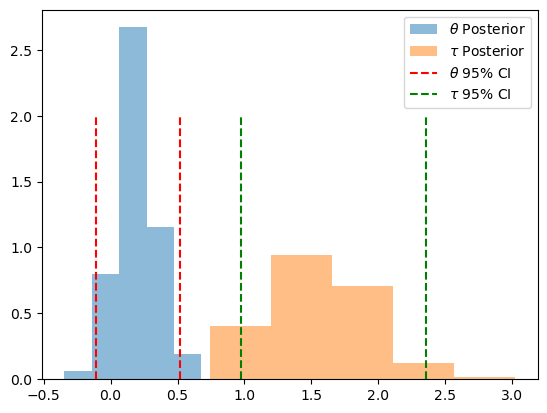

In [18]:
# Bayesian inference
theta_ci = np.percentile(theta[0,burn:], [2.5, 97.5])
tau_ci = np.percentile(tau[0,burn:], [2.5, 97.5])
plt.hist(theta[0, burn:], bins=5, density=True, alpha=0.5, label="$\\theta$ Posterior")
plt.hist(tau[0, burn:], bins=5, density=True, alpha=0.5, label="$\\tau$ Posterior")
plt.vlines(theta_ci, 0, 2, colors='r', linestyles='--', label="$\\theta$ 95% CI")
plt.vlines(tau_ci, 0, 2, colors='g', linestyles='--', label="$\\tau$ 95% CI")
plt.legend()
print("Theta 95% credidble interval: ", theta_ci)
print("Tau 95% credidble interval: ", tau_ci)

Determining the full conditional is not necessary because we can use our Metropolis Hastings within Gibbs sampling to examine the posterior. It is useful to determine the full conditional distributions. This is because if we know the full conditional, we are able to always accept in our Gibbs sampling. It's even better if the full conditional is easy to sample from because in that case, we don't even need to run Gibbs sampling. 

## Question 3

<u>show that</u> the **transition kernel** $K$ of transition probabilities is defined the **Metropolis Hastings** algorithm is

$K = \left[\begin{array}{cc}\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=0) & \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0)\\\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=1)& \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=1)\end{array}\right] = \left[\begin{array}{cl} 0.5 & 0.25 \\ 0.5 & 0.75 \end{array}\right]$


First, we are given:

proposal distribution $q(\tilde{x}^{(t)}|x^{(t-1)}) = \left(\frac{1}{2}\right)^{1-{\tilde x^{(t)}}}\left(\frac{1}{2}\right)^{\tilde x^{(t)}}$
We know that this propsoal distribution follows $\text{Bern}(0.5)$, which is a symmetrical distribution. Therefore, the ratio of proposal probabilities cancels out:

$\begin{aligned}
q(\tilde{x}^{(t)}|x^{(t-1)}) &= q(\tilde{x}^{(t-1)}|x^{(t)})\\
0.5 &= 0.5\\
\implies \frac{q(\tilde{x}^{(t-1)}|x^{(t)})}{q(\tilde{x}^{(t)}|x^{(t-1)})} &= \frac{0.5}{0.5}=1
\end{aligned}$

So, the Metropolis-Hastings acceptance probabilty is simplified:

$\begin{aligned}
\min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) = \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\cdot 1\right)
\end{aligned}$

Second, we know our that our stationary distrition is defined: $p(x^{(t)}) =\left(\frac{1}{3}\right)^{1-{\tilde x^{(t)}}}\left(\frac{2}{3}\right)^{\tilde x^{(t)}}$

This means that $p(0) = 1/3$ and $p(1) = 2/3$


In a case where we transition from 0 to 1:

$\begin{aligned}
MH_{accept}(0 \to 1) &= \min\left(1, \frac{p(1)}{p(0)}\right) = \min\left(1,\frac{2/3}{1/3}\right) = 1\\
\Pr(x^{(t)} = \tilde x^{(t)}) &= 0.5\\
\implies \Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=1) &= \Pr(x^{(t)} = \tilde x^{(t)})\cdot MH_{accept}(0 \to 1) = 0.5 \cdot 1\\ &= 0.5\\
\implies \Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=0) &= 1- \Pr(x^{(t)}=0 \rightarrow x^{(t+1)}) = 1-0.5 \\&= 0.5
\end{aligned}$

In the other case from 1 to 0:

$\begin{aligned}
MH_{accept}(1 \to 0) &= \min\left(1, \frac{p(0)}{p(1)}\right) = \min\left(1,\frac{1/3}{2/3}\right) = 0.5\\
\Pr(x^{(t)} = \tilde x^{(t)}) &= 0.5\\
\implies \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0) &= \Pr(x^{(t)} = \tilde x^{(t)}) \dot MH_{accept}(1 \to 0) = 0.5 \cdot 0.5 \\&= 0.25\\
\implies \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=1) &= 1- \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0) = 1-0.25 \\&= 0.75 
\end{aligned}$

Now combining the probabilities:

$K = \left[\begin{array}{cc}\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=0) & \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0)\\\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=1)& \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=1)\end{array}\right] = \left[\begin{array}{cl} 0.5 & 0.25 \\ 0.5 & 0.75 \end{array}\right]$
